In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

import numpy as np
# Load the dataset
file_path = 'data/london_merged.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset for a preliminary check
data.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,04/01/2015 00:00,182,3.0,2.0,93.0,6.0,3,0,1,3
1,04/01/2015 01:00,138,3.0,2.5,93.0,5.0,1,0,1,3
2,04/01/2015 02:00,134,2.5,2.5,96.5,0.0,1,0,1,3
3,04/01/2015 03:00,72,2.0,2.0,100.0,0.0,1,0,1,3
4,04/01/2015 04:00,47,2.0,0.0,93.0,6.5,1,0,1,3


# EDA

In [2]:
data.describe()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,1143.101642,12.468091,11.520836,72.324954,15.913063,2.722752,0.022051,0.285403,1.492075
std,1085.108068,5.571818,6.615145,14.313186,7.894570,2.341163,0.146854,0.451619,1.118911
min,0.000000,-1.500000,-6.000000,20.500000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,257.000000,8.000000,6.000000,63.000000,10.000000,1.000000,0.000000,0.000000,0.000000
50%,844.000000,12.500000,12.500000,74.500000,15.000000,2.000000,0.000000,0.000000,1.000000
75%,1671.750000,16.000000,16.000000,83.000000,20.500000,3.000000,0.000000,1.000000,2.000000
max,7860.000000,34.000000,34.000000,100.000000,56.500000,26.000000,1.000000,1.000000,3.000000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  int64  
 7   is_holiday    17414 non-null  int64  
 8   is_weekend    17414 non-null  int64  
 9   season        17414 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.3+ MB


(                cnt            t1            t2           hum    wind_speed  \
 count  17414.000000  17414.000000  17414.000000  17414.000000  17414.000000   
 mean    1143.101642     12.468091     11.520836     72.324954     15.913063   
 std     1085.108068      5.571818      6.615145     14.313186      7.894570   
 min        0.000000     -1.500000     -6.000000     20.500000      0.000000   
 25%      257.000000      8.000000      6.000000     63.000000     10.000000   
 50%      844.000000     12.500000     12.500000     74.500000     15.000000   
 75%     1671.750000     16.000000     16.000000     83.000000     20.500000   
 max     7860.000000     34.000000     34.000000    100.000000     56.500000   
 
        weather_code    is_holiday    is_weekend        season  
 count  17414.000000  17414.000000  17414.000000  17414.000000  
 mean       2.722752      0.022051      0.285403      1.492075  
 std        2.341163      0.146854      0.451619      1.118911  
 min        1.0000

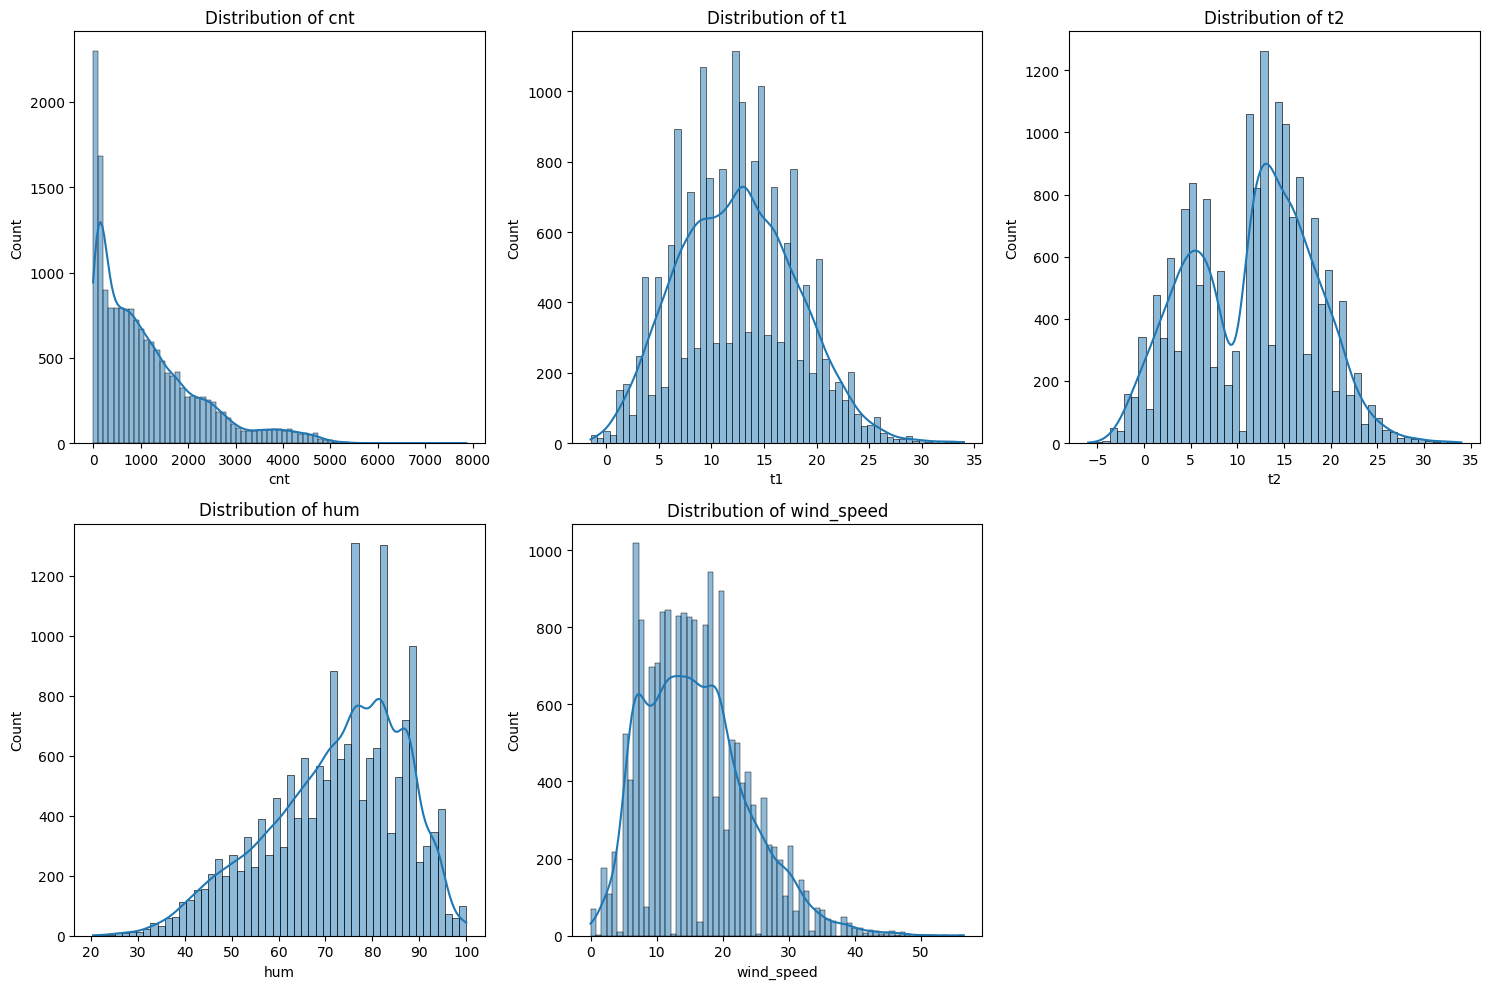

In [4]:

# Basic statistical summary
summary = data.describe()

# Checking for missing values
missing_values = data.isnull().sum()

# Plotting distributions of numerical features
plt.figure(figsize=(15, 10))
for i, column in enumerate(['cnt', 't1', 't2', 'hum', 'wind_speed'], start=1):
    plt.subplot(2, 3, i)
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()

summary, missing_values



# Model training

In [5]:
# Convert timestamp to datetime and extract useful features
data['timestamp'] = pd.to_datetime(data['timestamp'], format="%d/%m/%Y %H:%M")
data['hour'] = data['timestamp'].dt.hour
data['day_of_week'] = data['timestamp'].dt.dayofweek
data['month'] = data['timestamp'].dt.month

# Dropping the original timestamp column
data = data.drop(['timestamp'], axis=1)

# Splitting the data into features and target variable
X = data.drop('cnt', axis=1)
y = data['cnt']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize models
linear_reg = LinearRegression()
ridge_reg = Ridge(random_state=42)
lasso_reg = Lasso(random_state=42)
randomforest_reg = RandomForestRegressor(random_state=42)
xgboost_reg = XGBRegressor(random_state=42)

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Creating pipelines for each model
# For models sensitive to feature scale, we add StandardScaler in the pipeline
pipelines = {
    'Linear Regression': Pipeline([('scaler', StandardScaler()), ('model', LinearRegression())]),
    'Ridge Regression': Pipeline([('scaler', StandardScaler()), ('model', Ridge(random_state=42))]),
    'Lasso Regression': Pipeline([('scaler', StandardScaler()), ('model', Lasso(random_state=42))]),
    'Decision Tree': Pipeline([('model', DecisionTreeRegressor(random_state=42))]),  # No scaling needed
    'Random Forest': Pipeline([('model', RandomForestRegressor(random_state=42))]),  # No scaling needed
    'XGBoost': Pipeline([('model', XGBRegressor(random_state=42))])  # No scaling needed
}

# Dictionary to store cross-validated results
cv_results_scaled = {}

# Perform cross-validation for each pipeline
for name, pipeline in pipelines.items():
    scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_mse = -scores.mean()
    cv_std = scores.std()
    cv_results_scaled[name] = {'CV MSE': cv_mse, 'CV Std': cv_std}

cv_results_scaled_df = pd.DataFrame(cv_results_scaled).T
cv_results_scaled_df

,CV MSE,CV Std
Linear Regression,813358.737915,37020.204310
Ridge Regression,813357.916857,37022.590220
Lasso Regression,813575.646899,37057.607246
Decision Tree,109800.886262,9380.717404
Random Forest,56008.334482,5407.149831
XGBoost,51928.019373,5170.768855


In [35]:
# Cross-validated performance of each model
best_model_name = min(cv_results_scaled, key=lambda k: cv_results_scaled[k]['CV MSE'])
best_pipeline = pipelines[best_model_name]


best_pipeline.fit(X_train, y_train)
y_pred = best_pipeline.predict(X_test)


test_mse = mean_squared_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)

print(f"Selected Model: {best_model_name}")
print(f"Test MSE: {test_mse}")
print(f"Test R2 Score: {test_r2}")

Selected Model: XGBoost
Test MSE: 49794.738235051744
Test R2 Score: 0.9584435382895673


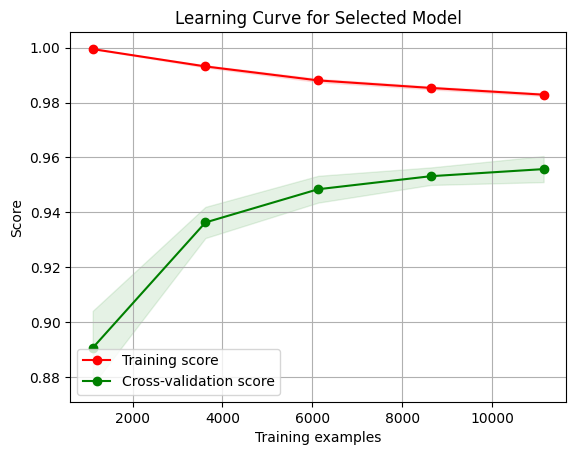

In [36]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

def plot_learning_curve(estimator, X, y, title):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5))

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Example usage with a chosen model
plot_learning_curve(best_pipeline, X_train, y_train, "Learning Curve for Selected Model")
plt.show()

In [39]:
import optuna
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

def objective(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'max_depth': trial.suggest_int('max_depth', 3, 9),
        'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.1),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 6),
        'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_uniform('gamma', 0.0, 5.0)
    }


    model = XGBRegressor(**param)
    model.fit(X_train, y_train)


    preds = model.predict(X_test)
    mse = mean_squared_error(y_test, preds)

    return mse


study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)  


print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

/home/bruceewue/london_bike_ml/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2023-12-19 21:21:00,486] A new study created in memory with name: no-name-001ec98e-a514-496c-b135-9507cd074ba2
/tmp/ipykernel_21626/952190133.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.1),
/tmp/ipykernel_21626/952190133.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_21626/952190133.py:

Number of finished trials: 100
Best trial: {'n_estimators': 275, 'max_depth': 8, 'learning_rate': 0.07070693871571615, 'min_child_weight': 1, 'subsample': 0.5609764636237523, 'colsample_bytree': 0.9347629599226998, 'gamma': 4.47355915479421}


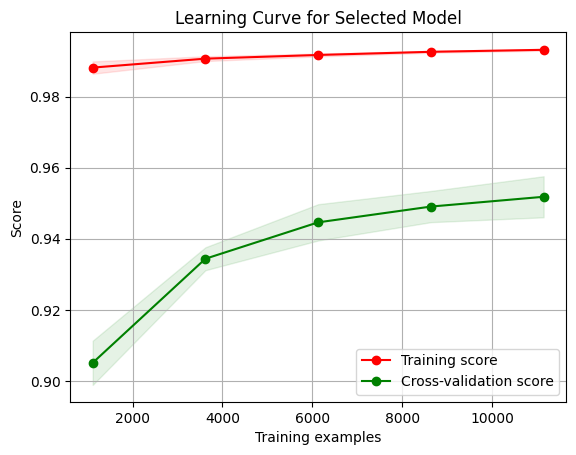

In [8]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

def plot_learning_curve(estimator, X, y, title):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5))

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt


# best_params = study.best_trial.params
# best_model = XGBRegressor(**best_params)
best_model = RandomForestRegressor()

# Example usage with a chosen model
plot_learning_curve(best_model, X_train, y_train, "Learning Curve for Selected Model")
plt.show()


In [10]:
# Whole dataset
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
print(f"Test MSE: {mse}")
test_r2 = r2_score(y_test, y_pred)
print(f"Test R2 Score: {test_r2}")

Test MSE: 52470.08908436861
Test R2 Score: 0.9562108101124093


<Figure size 1000x800 with 0 Axes>

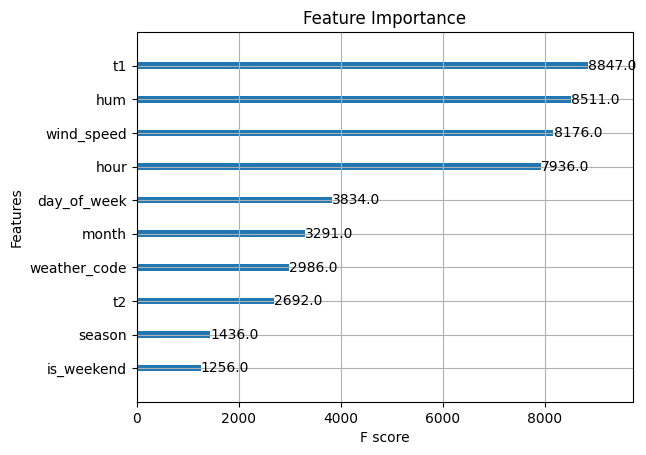

In [43]:
from xgboost import plot_importance


plt.figure(figsize=(10, 8))
plot_importance(best_model, max_num_features=10) 
plt.title("Feature Importance")
plt.ylabel('Features')
plt.xlabel('F score')
plt.show()